In [0]:
from fastai.vision import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


##Creating Directories of Images


In [0]:
folder = 'lion'
file = 'urls_lion.txt'

In [0]:
folder = 'tiger'
file = 'urls_tiger.txt'

In [0]:
folder = 'stuffed'
file = 'urls_stuffed.txt'

In [0]:
path = Path('/content/drive/My Drive/Colab Notebooks/FastAI/Lesson_2')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

In [13]:
path.ls()

[PosixPath('/content/drive/My Drive/Colab Notebooks/FastAI/Lesson_2/urls_stuffed.txt'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/FastAI/Lesson_2/urls_tiger.txt'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/FastAI/Lesson_2/urls_lion.txt'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/FastAI/Lesson_2/lion'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/FastAI/Lesson_2/tiger'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/FastAI/Lesson_2/stuffed')]

In [0]:
classes = ['lion', 'stuffed', 'tiger']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(
                                      imagenet_stats
                                  )

In [17]:
data.classes

['lion', 'stuffed', 'tiger']

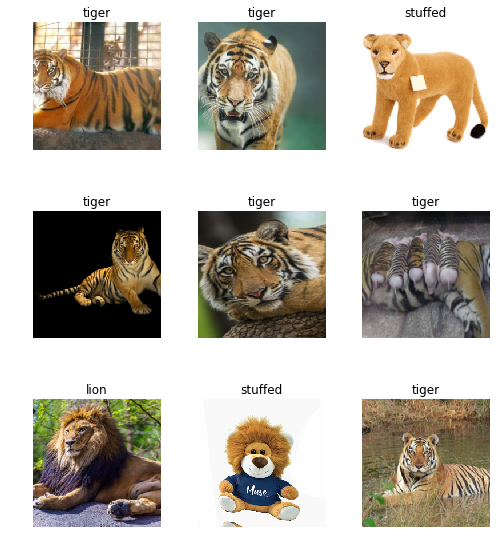

In [19]:
data.show_batch(rows=3, figsize=(7,8))

In [20]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['lion', 'stuffed', 'tiger'], 3, 452, 113)

##Train Model
(Resnet34)

In [21]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 112MB/s]


In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.222428,0.182950,0.044248,00:12
1,0.671729,0.242456,0.044248,00:10
2,0.461828,0.226323,0.053097,00:10
3,0.341794,0.205835,0.044248,00:10


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [25]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


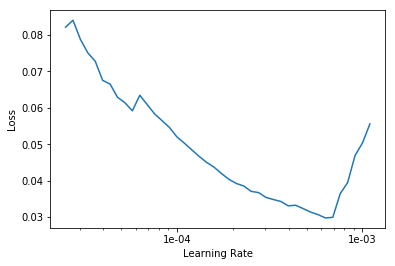

In [26]:
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-35))

epoch,train_loss,valid_loss,error_rate,time
0,0.069875,0.195945,0.053097,00:11
1,0.064847,0.199124,0.053097,00:11


In [0]:
learn.save('stage-2')

In [0]:
learn.unfreeze()

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


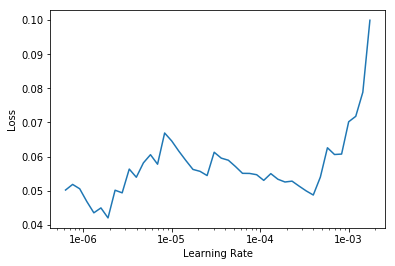

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(2, max_lr=slice(1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.050066,0.186318,0.053097,00:11
1,0.038844,0.190843,0.053097,00:11


In [0]:
learn.save('stage-3')

##Interpretation

In [36]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (452 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lion,lion,lion,lion,lion
Path: /content/drive/My Drive/Colab Notebooks/FastAI/Lesson_2;

Valid: LabelList (113 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
stuffed,stuffed,tiger,stuffed,stuffed
Path: /content/drive/My Drive/Colab Notebooks/FastAI/Lesson_2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), 

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

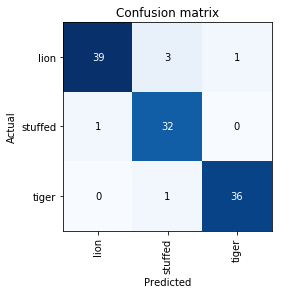

In [38]:
interp.plot_confusion_matrix()

##Cleaning Data

##Model to Production

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

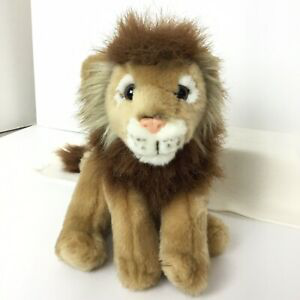

In [46]:
img = open_image(path/'test_img'/'test_0001.jpg')
img

In [0]:
learn = load_learner(path)

In [48]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category stuffed